# Agenda

1. Sorting
2. Strings and series
3. Plotting 
4. Data frames
     - Defining
     - Reading data from files into them
     - Sorting
     - Grouping
     - Pivot tables
     - Plotting

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [5]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('fhiabjcgde'))
s

f    44
h    47
i    64
a    67
b    67
j     9
c    83
g    21
d    36
e    87
dtype: int64

In [6]:
# how can I sort these?

# in Python, the sorted() function uses "TimSort"

# we can sort a series by its index (sort_index), or by its values (sort_values)

In [7]:
help(s.sort_index)

Help on method sort_index in module pandas.core.series:

sort_index(axis=0, level=None, ascending: 'bool | int | Sequence[bool | int]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None) method of pandas.core.series.Series instance
    Sort Series by index labels.
    
    Returns a new Series sorted by label if `inplace` argument is
    ``False``, otherwise updates the original series and returns None.
    
    Parameters
    ----------
    axis : int, default 0
        Axis to direct sorting. This can only be 0 for Series.
    level : int, optional
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        Sort ascending vs. descending. When the index is a MultiIndex the
        sort direction can be controlled for each level individually.
    inplace : bool, default False
        If True, 

In [8]:
s.sort_index()

a    67
b    67
c    83
d    36
e    87
f    44
g    21
h    47
i    64
j     9
dtype: int64

In [9]:
s.sort_values()

j     9
g    21
d    36
f    44
h    47
i    64
a    67
b    67
c    83
e    87
dtype: int64

# Strings

In [10]:
a = np.array('this is a test'.split())
a

array(['this', 'is', 'a', 'test'], dtype='<U4')

In [11]:
s = Series('this is a test'.split())
s

0    this
1      is
2       a
3    test
dtype: object

In [12]:
pd.NA

<NA>

In [13]:
pd.StringDtype

pandas.core.arrays.string_.StringDtype

In [14]:
s

0    this
1      is
2       a
3    test
dtype: object

In [16]:
# I want to know how long each string (element) is in s

# option 1: for loop.  DO NOT DO THIS!
sum([len(one_word)
for one_word in s])

11

In [17]:
# option 2: use the str accessor in Pandas
# meaning: Each series has a .str attribute.  Via that attribute, we can invoke many methods 

s.str.len()   # this invokes "len" on each element of s, returning a new series

0    4
1    2
2    1
3    4
dtype: int64

In [18]:
# what is the total length of characters in all of our words?
# s.str.len() returned a series

s.str.len().sum()   # calculate the lengths, then sum them up

11

In [19]:
s.str.isdigit()  # this returns True if all characters in a string are digits (0-9)

0    False
1    False
2    False
3    False
dtype: bool

In [20]:
s.str.contains('e')   # which words contain the character 'e'?

0    False
1    False
2    False
3     True
dtype: bool

In [21]:
# str.contains supports regular expressions!  
# https://RegexpCrashCourse.com/

# Exercise: Strings in series

1. Create a series with 10 strings (words). Try to have them vary in length.
2. Find all of the words whose lengths are < the mean word length.
3. Find all the words that contain both 'a' and 'e'.  (It might be empty!)


In [22]:
s = Series('this is a very exciting and interesting example series is it not'.split())
s

0            this
1              is
2               a
3            very
4        exciting
5             and
6     interesting
7         example
8          series
9              is
10             it
11            not
dtype: object

In [23]:
s.str.len()

0      4
1      2
2      1
3      4
4      8
5      3
6     11
7      7
8      6
9      2
10     2
11     3
dtype: int64

In [26]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
3     very
5      and
9       is
10      it
11     not
dtype: object

In [29]:
# find words that contain both 'a' and 'e'
s[s.str.contains('a') & s.str.contains('e')]

7    example
dtype: object

In [32]:
# how often does each word length appear in my series?
# we can use "value_counts", a method that runs on a series

# the result of value_counts is a series s:
# - the index to the series contains the unique values from s
# - the values in the series contain the (sorted, descending order) count for each value in s
s.str.len().value_counts()

2     3
4     2
3     2
1     1
8     1
11    1
7     1
6     1
dtype: int64

In [33]:
s.str.len().value_counts(normalize=True)   # return percentages, not numbers

2     0.250000
4     0.166667
3     0.166667
1     0.083333
8     0.083333
11    0.083333
7     0.083333
6     0.083333
dtype: float64

In [34]:
s = Series(['apple', 'apple', 'banana', 'apple', 'banana', 'apple', 'cherry', 'cherry', 'banana'])
s

0     apple
1     apple
2    banana
3     apple
4    banana
5     apple
6    cherry
7    cherry
8    banana
dtype: object

In [35]:
s.value_counts()

apple     4
banana    3
cherry    2
dtype: int64

In [36]:
s.unique()

array(['apple', 'banana', 'cherry'], dtype=object)

# Plotting

<AxesSubplot:>

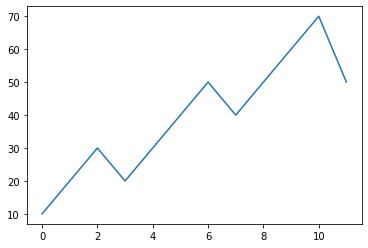

In [38]:
s = Series([10, 20, 30, 20, 30, 40, 50, 40, 50, 60, 70, 50])
s.plot.line()    # create a line plot from our series (because of "inline", show it in the browser)

<AxesSubplot:title={'center':'My amazing plot'}>

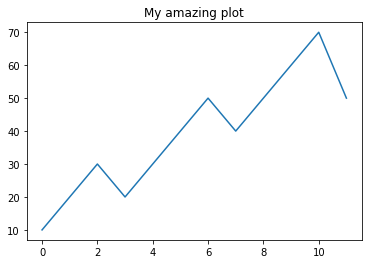

In [39]:
# customize this plot

s.plot.line(title='My amazing plot')

<AxesSubplot:title={'center':'My amazing plot'}>

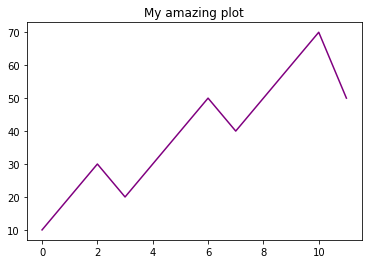

In [40]:
s.plot.line(title='My amazing plot', color='purple')

<AxesSubplot:title={'center':'My amazing plot'}>

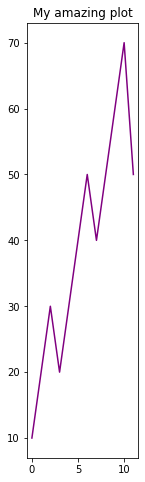

In [44]:
#                                                          (width,height)
s.plot.line(title='My amazing plot', color='purple', figsize=(2,8)) # figsize takes (inches, inches)

<AxesSubplot:>

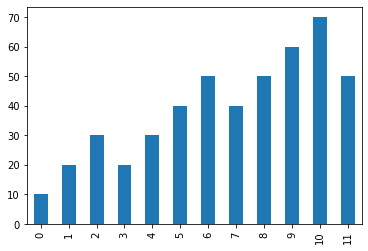

In [45]:
# bar plot!
s.plot.bar()

<AxesSubplot:>

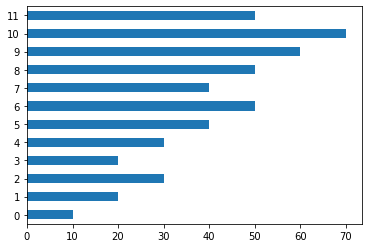

In [46]:
s.plot.barh()

<AxesSubplot:>

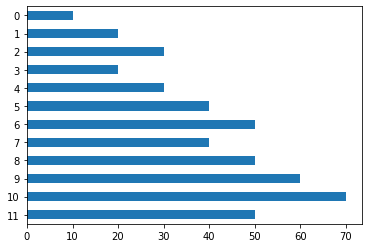

In [47]:
s.sort_index(ascending=False).plot.barh()

<AxesSubplot:ylabel='Frequency'>

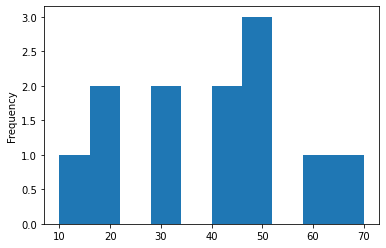

In [48]:
# histogram -- divide our data into 10 buckets. plot the size (height) of each bucket,
# with the height representing how many there were

s.plot.hist()

In [49]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     50
7     40
8     50
9     60
10    70
11    50
dtype: int64

In [50]:
s.value_counts()

50    3
20    2
30    2
40    2
10    1
60    1
70    1
dtype: int64

In [51]:
# descriptive statistics -- John Tewkey
s.describe()

count    12.000000
mean     39.166667
std      17.816404
min      10.000000
25%      27.500000
50%      40.000000
75%      50.000000
max      70.000000
dtype: float64

<AxesSubplot:>

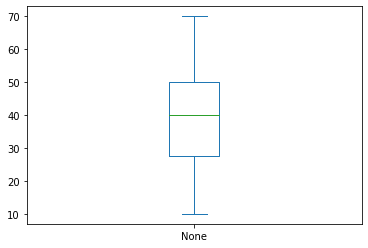

In [52]:
# we can get a visual version of describe, with "box and whiskers plots"

s.plot.box()

<AxesSubplot:ylabel='None'>

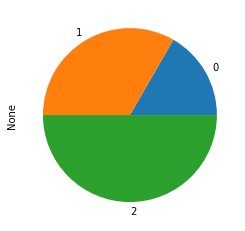

In [53]:
s = Series([10, 20, 30])

s.plot.pie()   # total the values, show what proportion each element contributed to the total

In [54]:
# it's common to create a pie plot based on the output from value_counts
# meaning: call value_counts, which gives you a series, showing how often each value was there
# turn that series into a pie plot.

# Exercise: Weather plotting

1. Get the weather report for your city over the coming 10 days, and create a series with the high temperatures. This index should contain the dates ('YYMMDD').
2. Create a line plot for the temperatures. 
3. Create a pie plot, showing how often each temperature appears in the 10-day forecast. 
4. Create a box plot with the temperatures. What are the minimum, maximum, and median (50%) temperatures? Compare this with the call to "describe" -- which makes more sense to you?

In [ ]:
s = Series([18, 17, 15, 16, 17, 18, 15, 14, 14, 13],
          index='')